In [10]:
"""
I: Load modules and data, calculate returns
"""

import pandas as pd

original_df = pd.read_csv("stocks_30min_data.csv")
pivot_df = original_df.pivot(index="Datetime", columns="Ticker")
returns_df = pivot_df["Open"].pct_change().shift(-1).dropna()

tickers = returns_df.columns
for ticker in tickers:
    pivot_df[('Return', ticker)] = returns_df[ticker]
returns_df.head()

Ticker,AAPL,AMZN,GOOGL,JPM,META,MSFT,NFLX,NVDA,TSLA,V
Datetime,,,,,,,,,,
2025-02-26 14:30:00+00:00,-0.003724,0.009027,-0.000057,0.010752,0.018979,0.005565,0.016499,0.006578,0.006075,0.000943
2025-02-26 15:00:00+00:00,0.000308,0.000346,0.000685,-0.000624,0.004582,0.004685,0.000191,-0.002828,-0.033578,0.002869
2025-02-26 15:30:00+00:00,-0.005339,0.000968,0.003197,0.001760,0.004146,0.001368,0.001158,0.012570,0.017609,-0.000925
2025-02-26 16:00:00+00:00,-0.001631,-0.001243,-0.001992,-0.003497,-0.000767,0.000273,0.001906,0.002309,-0.005724,-0.000698
2025-02-26 16:30:00+00:00,0.005914,-0.000876,-0.004561,0.000617,0.003232,-0.000993,-0.000077,-0.002303,-0.001437,0.000841


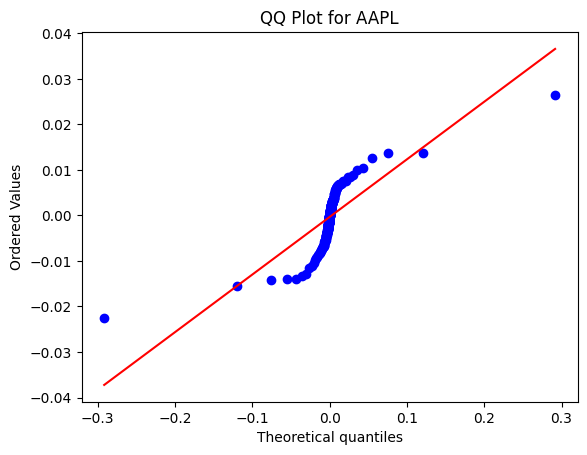

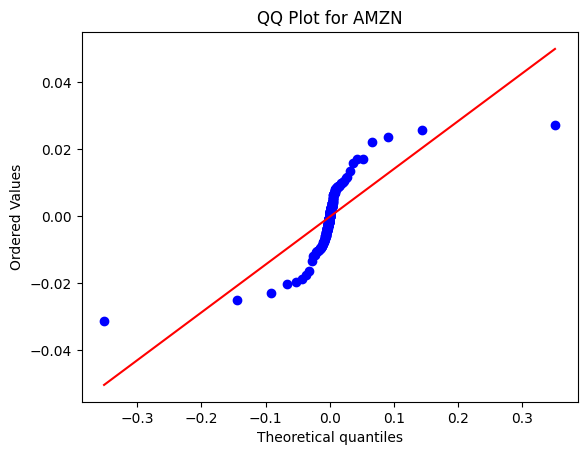

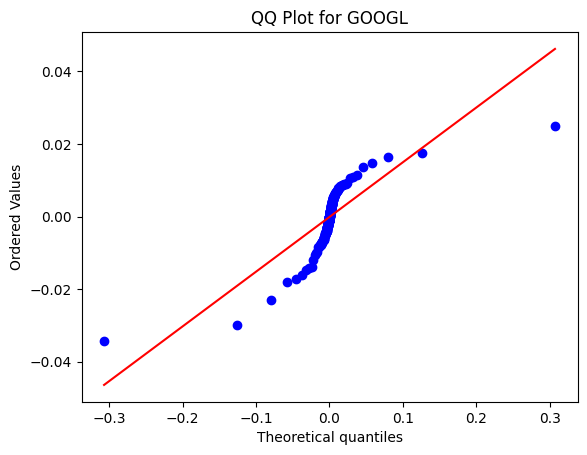

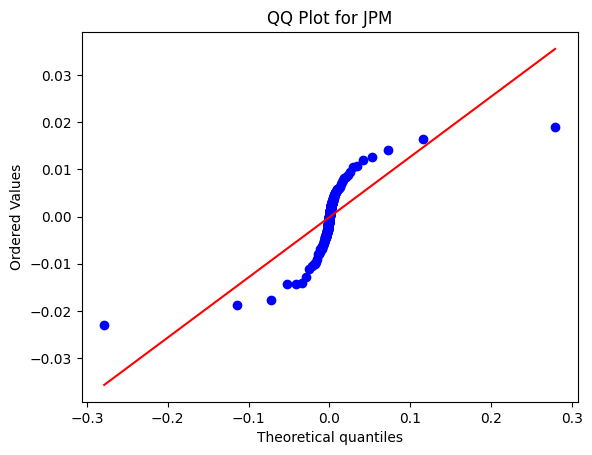

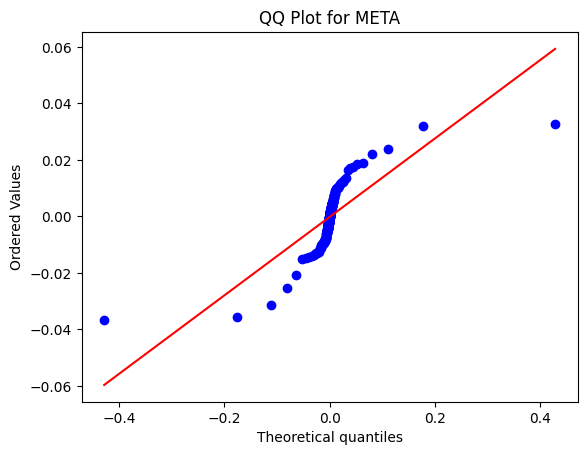

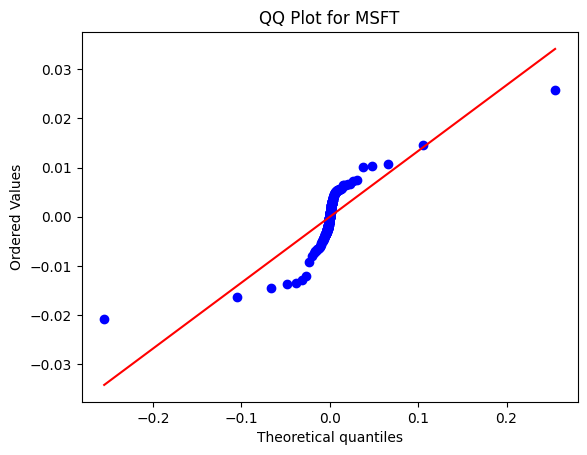

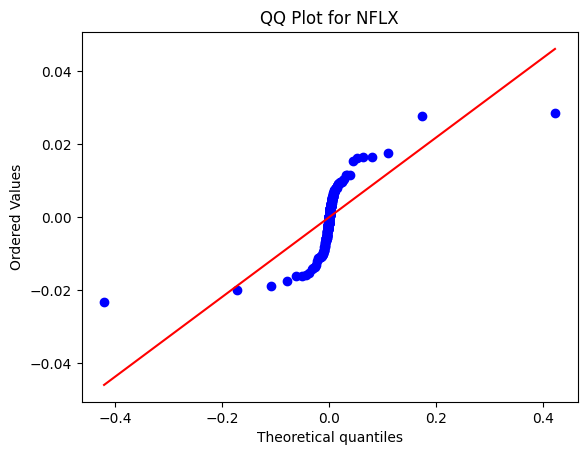

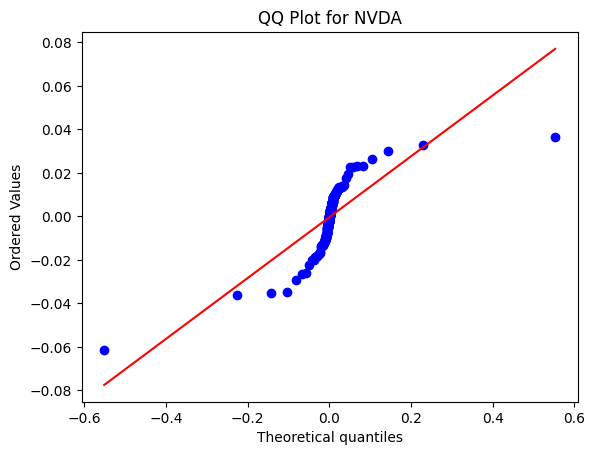

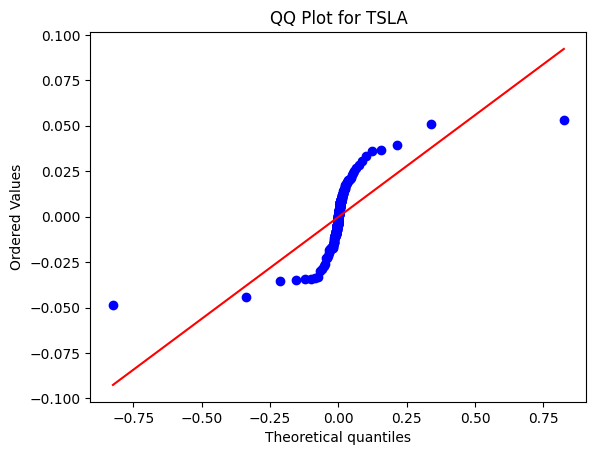

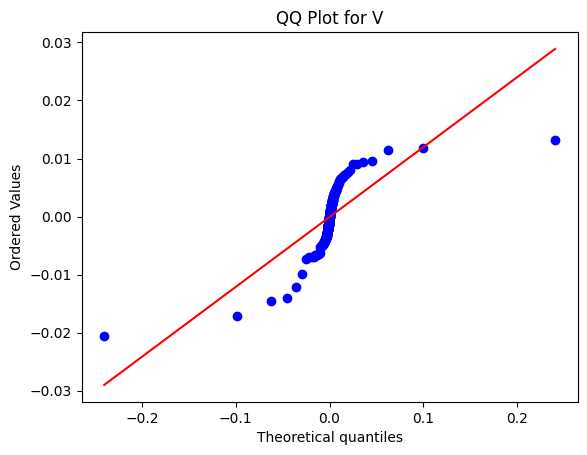

In [15]:
"""
II: Fit returns to Cauchy distribution
"""

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


distributions = {}
fitScore = {}
for ticker in tickers:
    data = np.array(returns_df[ticker])

    # Fit the Cauchy distribution to the data
    params = st.cauchy.fit(data)

    # Extract the fitted parameters (location and scale)
    loc_fitted, scale_fitted = params
    distributions[ticker] = lambda x: st.cauchy.pdf(x, loc=loc_fitted, scale=scale_fitted)

    # Generate QQ plot
    st.probplot(data, dist="cauchy", sparams=(loc_fitted, scale_fitted), plot=plt)
    plt.title(f"QQ Plot for {ticker}")
    plt.show()

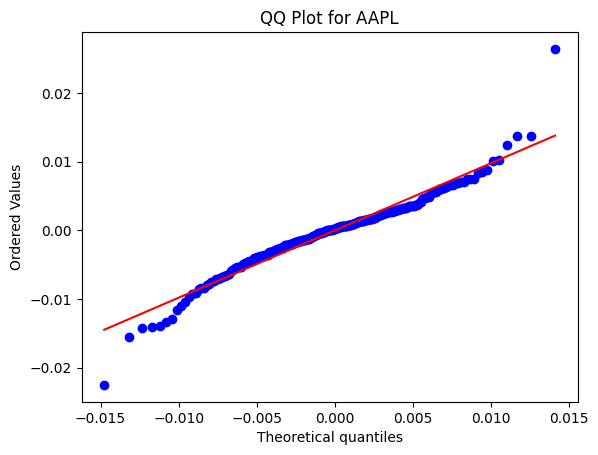

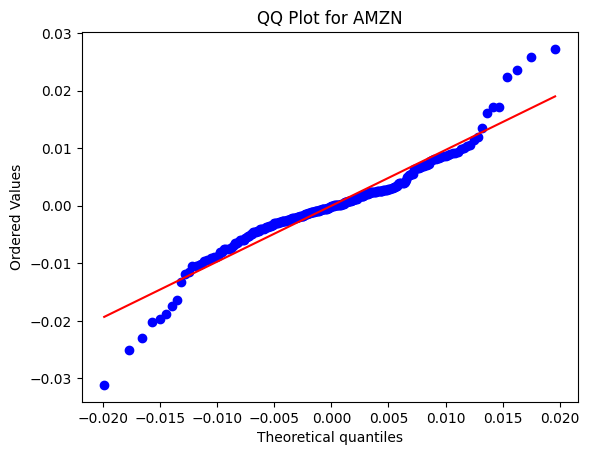

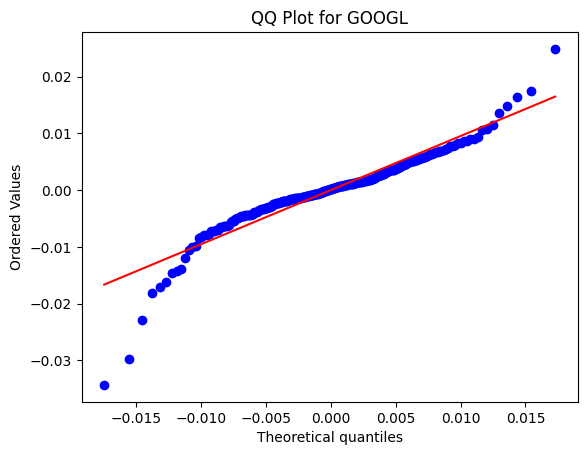

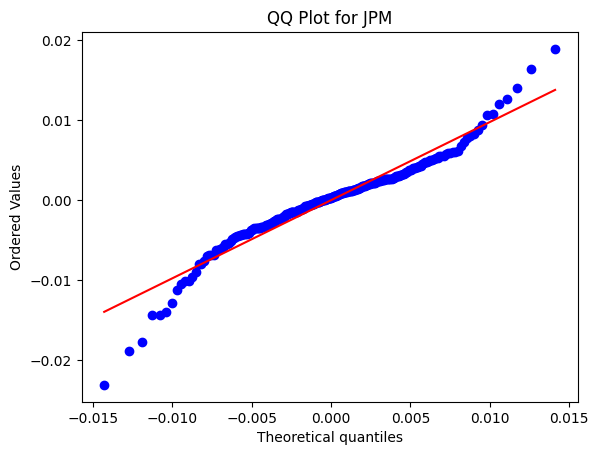

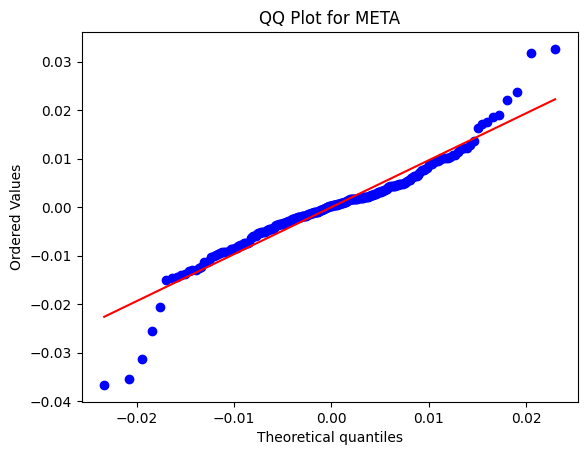

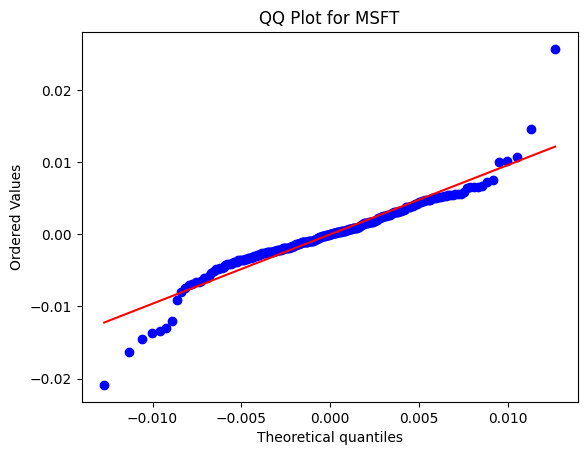

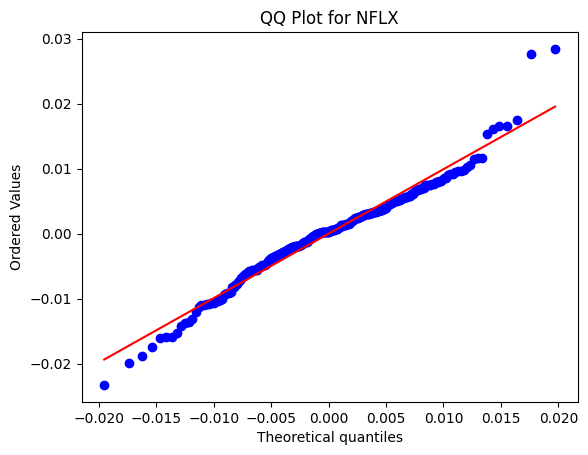

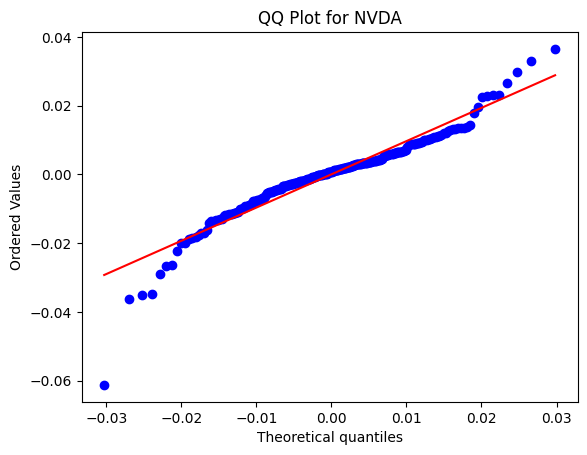

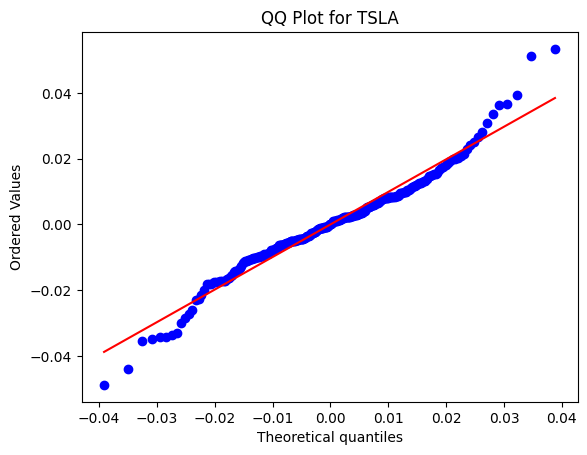

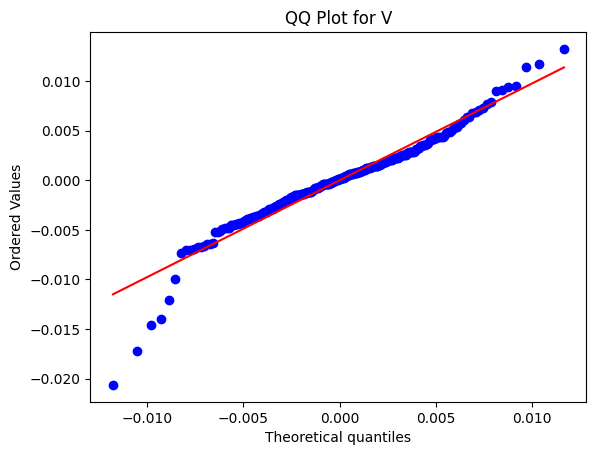

In [17]:
distributions = {}
fitScore = {}
for ticker in tickers:
    data = np.array(returns_df[ticker])

    # Fit the Cauchy distribution to the data
    params = st.norm.fit(data)

    # Extract the fitted parameters (location and scale)
    loc_fitted, scale_fitted = params
    distributions[ticker] = lambda x: st.norm.pdf(x, loc=loc_fitted, scale=scale_fitted)

    # Generate QQ plot
    st.probplot(data, dist="norm", sparams=(loc_fitted, scale_fitted), plot=plt)
    plt.title(f"QQ Plot for {ticker}")
    plt.show()

In [4]:
"""
II.b: Report goodness-of-fit per stock (bar chart), example QQ plot for worst (Level 1 Cauchy Distribution) and best (Level 50 Cauchy Distribution)
"""




'\nII.b: Report goodness-of-fit per stock (bar chart), example QQ plot for worst (Level 1 Cauchy Distribution) and best (Level 50 Cauchy Distribution)\n'

In [5]:
"""
III: Calculate sample-estimated statistics and VaR for all stocks
"""




'\nIII: Calculate sample-estimated statistics and VaR for all stocks\n'

In [6]:
"""
IV: Solve the modified Markowitz model
"""




'\nIV: Solve the modified Markowitz model\n'